In [195]:
import pandasdmx
oecd = pandasdmx.Request('OECD')

In [196]:
data_response = oecd.data(resource_id='NAAG', key='all?startTime=2000')

In [197]:
data = data_response.to_pandas()

In [198]:
data.columns.names

FrozenList(['LOCATION', 'INDICATOR'])

In [199]:
data.columns.levels

FrozenList([['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'EMU', 'ESP', 'EST', 'EUU', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IDN', 'IND', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'NLD', 'NOR', 'NZL', 'OTO', 'POL', 'PRT', 'RUS', 'SVK', 'SVN', 'SWE', 'TUR', 'USA', 'ZAF'], ['AN1111NS14_S15HCPC', 'AN11NVIXOB', 'AN211NS14_S15HCPC', 'ANNS14_S15HCPC', 'ANOTHNS14_S15HCPC', 'B11CG', 'B1GG', 'B1GSB1G', 'B1GVACG', 'B1GVAG', 'B1GVASB1G', 'B1GVB_ECG', 'B1GVB_EG', 'B1GVB_ESB1G', 'B1GVB_FCG', 'B1GVB_FSB1G', 'B1GVCCG', 'B1GVCG', 'B1GVCSB1G', 'B1GVFCG', 'B1GVFG', 'B1GVFSB1G', 'B1GVG_ICG', 'B1GVG_IG', 'B1GVG_ISB1G', 'B1GVG_UCG', 'B1GVG_USB1G', 'B1GVJCG', 'B1GVJG', 'B1GVJSB1G', 'B1GVKCG', 'B1GVKG', 'B1GVKSB1G', 'B1GVLCG', 'B1GVLG', 'B1GVLSB1G', 'B1GVM_NCG', 'B1GVM_NG', 'B1GVM_NSB1G', 'B1GVO_QCG', 'B1GVO_QG', 'B1GVO_QSB1G', 'B1GVR_UCG', 'B1GVR_UG', 'B1GVR_USB1G', 'B2NSB1NS11', 'B2NSB1NS12', 'B5NG', 'B5NVIXOB', 'B6GS14_S15HCPC', 'B6NS1

In [200]:
df = data.unstack()

In [201]:
df = df.reset_index()
df.head()

,LOCATION,INDICATOR,TIME_PERIOD,0
0,AUS,AN1111NS14_S15HCPC,2000,29328.522939
1,AUS,AN1111NS14_S15HCPC,2001,30305.272265
2,AUS,AN1111NS14_S15HCPC,2002,32538.689010
3,AUS,AN1111NS14_S15HCPC,2003,35127.595654
4,AUS,AN1111NS14_S15HCPC,2004,37546.902790


In [202]:
uki = df[((df['LOCATION'] == 'IRL') | (df['LOCATION'] == 'GBR') | (df['LOCATION'] == 'DEU') | (df['LOCATION'] == 'NLD'))].copy()


In [203]:
fields = ['GDPCXC','D2D5D91RS13S','D61RS1311S']

In [204]:
uki_f = uki.INDICATOR.isin(fields)

In [205]:
gbr = uki[uki_f].copy()

In [206]:
valu = {'GDPCXC':'GDP BN USD',
          'D2D5D91RS13S':'Income Tax GDP%',
          'D61RS1311S':'Social_Con GDP%'}

gbr['Des'] = gbr.INDICATOR.map(valu)

In [207]:
gbr.columns = ['Cty','Measure','Year','Value','Des']

In [208]:
gbr

,Cty,Measure,Year,Value,Des
34880,DEU,D2D5D91RS13S,2000,23.654609,Income Tax GDP%
34881,DEU,D2D5D91RS13S,2001,21.947950,Income Tax GDP%
34882,DEU,D2D5D91RS13S,2002,21.520618,Income Tax GDP%
34883,DEU,D2D5D91RS13S,2003,21.649100,Income Tax GDP%
34884,DEU,D2D5D91RS13S,2004,21.130996,Income Tax GDP%
...,...,...,...,...,...
112115,NLD,GDPCXC,2015,765.572771,GDP BN USD
112116,NLD,GDPCXC,2016,784.060430,GDP BN USD
112117,NLD,GDPCXC,2017,833.869642,GDP BN USD
112118,NLD,GDPCXC,2018,914.043438,GDP BN USD


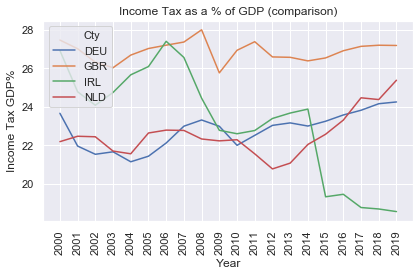

In [209]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Year", y="Value", data=gbr[gbr['Measure']=='D2D5D91RS13S'], hue="Cty")
_ = plt.xlabel('Year')
_ = plt.ylabel('Income Tax GDP%')
_ = plt.title('Income Tax as a % of GDP (comparison)')
_ = plt.xticks(rotation=90)
_ = plt.legend(loc='upper left')
_ = plt.tight_layout()